In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression algorithm
def logistic_regression(X, y, learning_rate, num_iterations):
    m, n = X.shape
    theta = np.zeros(n) # Initialize parameters

    for iteration in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)

        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta

In [3]:
# Generate synthetic data
np.random.seed(0)
m = 100
n = 2
X = np.random.randn(m, n)
X = np.hstack((np.ones((m, 1)), X))
true_theta = np.array([1, 2, 3])
y = (sigmoid(np.dot(X, true_theta)) > 0.5).astype(int)

# Training
learning_rate = 0.1
num_iterations = 1000
learned_theta = logistic_regression(X, y, learning_rate, num_iterations)

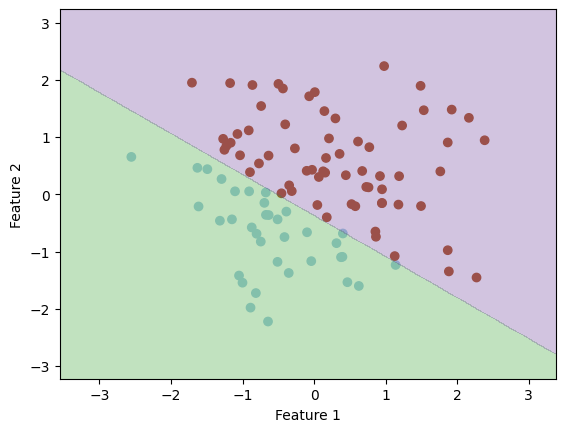

In [7]:
# Visualize the data and decision boundary
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, marker='o')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

X_grid = np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]
probabilities = sigmoid(np.dot(X_grid, learned_theta))
y_grid = probabilities > 0.5
y_grid = y_grid.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_grid, alpha=0.3, cmap=plt.cm.Paired)
plt.show()